In [94]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [95]:
# more readable visuals 
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-white')
plt.rcParams.update(params)
%matplotlib inline

/tmp/ipykernel_17833/2071146880.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [96]:
# load Iris dataset
iris = load_iris()
X = iris.data # predictor
y = iris.target #response

print('The predictor variable shape: ', X.shape)
print('The response variable shape: ', y.shape)

# Standardize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

The predictor variable shape:  (150, 4)
The response variable shape:  (150,)


In [97]:
input_dim = X_scaled.shape[1] #input shape
output_dim = X_scaled.shape[1]
encoding_dim = 2 # encoding dimension - #neurons for the dense layers
optimizer = 'adam'
loss = 'mse'

input_layer = tf.keras.Input(shape=(input_dim,), name='input') # input layer
encoding_layer = tf.keras.layers.Dense(encoding_dim, name='encoding')(input_layer) # encoding layer
decoding_layer = tf.keras.layers.Dense(output_dim, name='decoding')(encoding_layer) # decoding layer

autoencoder = tf.keras.Model(input_layer, decoding_layer)
autoencoder.compile(optimizer=optimizer, loss=loss)
autoencoder.summary()

Model: "model_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 4)]               0         
                                                                 
 encoding (Dense)            (None, 2)                 10        
                                                                 
 decoding (Dense)            (None, 4)                 12        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


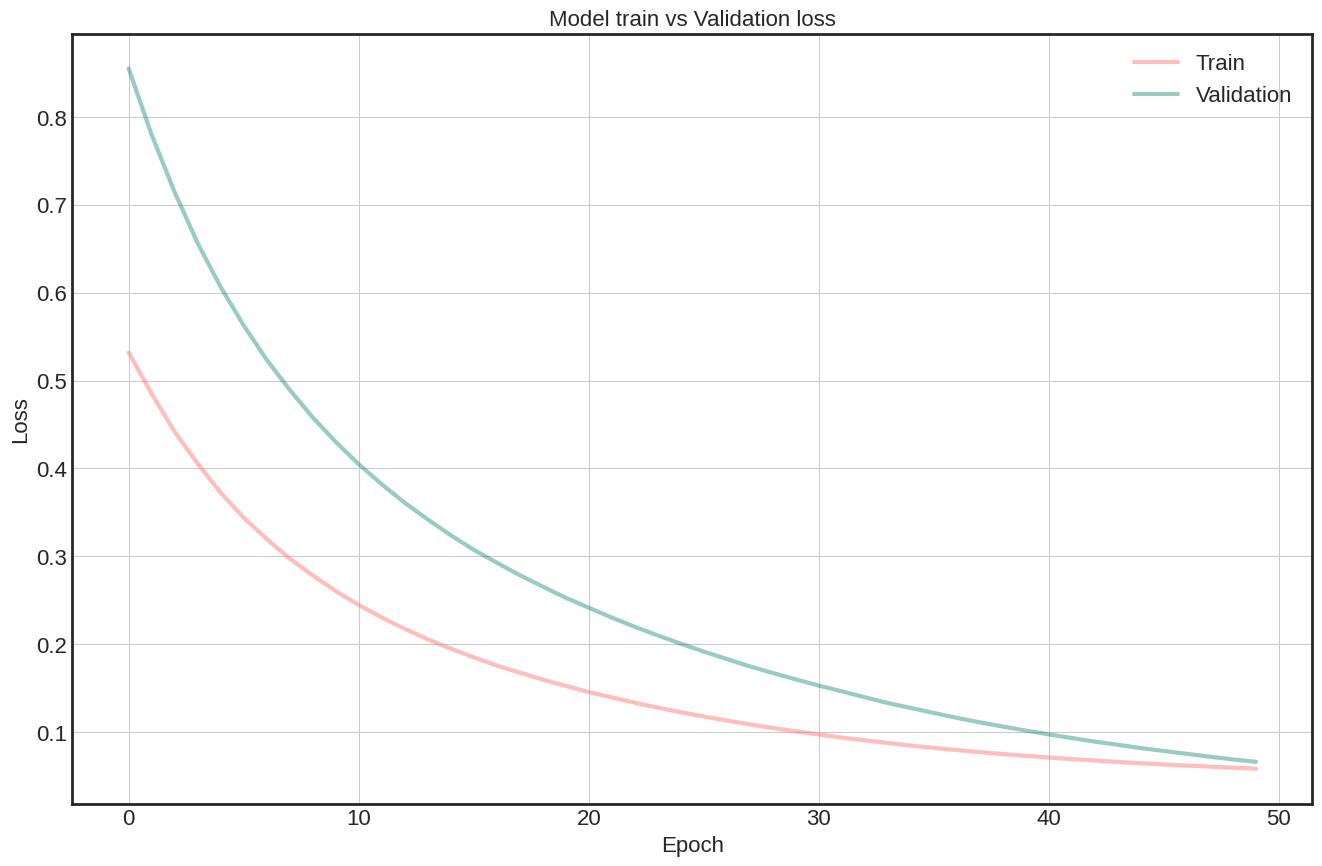

In [98]:
# Set other parameters
epochs=50
batch_size=16
shuffle=True
validation_split=0.1
verbose=0

# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=1)

history = autoencoder.fit(X_scaled, X_scaled,
                          epochs=epochs,
                          batch_size=batch_size,
                          shuffle=shuffle,
                          validation_split=validation_split,
                          verbose=verbose)
#                           callbacks=[early_stop])

# Plot the loss 
plt.plot(history.history['loss'], color='#FF7E79',linewidth=3, alpha=0.5)
plt.plot(history.history['val_loss'], color='#007D66', linewidth=3, alpha=0.4)
plt.title('Model train vs Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid(True)
plt.show()

In [102]:
print("Training loss:", history.history['loss'][-1])
print("Validation loss:", history.history['val_loss'][-1])

Training loss: 0.058617886155843735
Validation loss: 0.06632693856954575


In [99]:
def plot3clusters(X, title, vtitle, target_names):
    colors = ['#A43F98', '#5358E0', '#DE0202']
    s = 50
    alpha = 0.7
    
    plt.figure(figsize=(9, 7))
    plt.grid(True)
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=alpha, s=s, label=target_name)
   
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title, fontsize=16, fontweight='bold')
    
    plt.text(0.5, -0.1, 'Principal Component 1', ha='center', fontsize=12, fontweight='bold', transform=plt.gca().transAxes)
    plt.text(-0.1, 0.5, 'Principal Component 2', va='center', rotation='vertical', fontsize=12, fontweight='bold', transform=plt.gca().transAxes)
    
    plt.show()

5/5 [==============================] - 0s 1ms/step


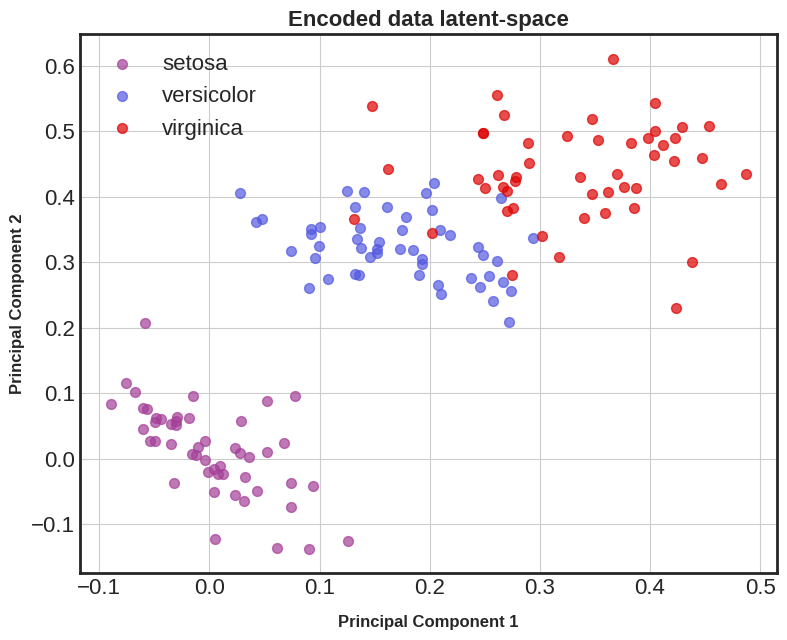

In [100]:
encoder = tf.keras.Model(input_layer, encoding_layer)
encoded_data = encoder.predict(X_scaled)

target_names = iris.target_names

plot3clusters(encoded_data, 'Encoded data latent-space', 'dimension ', target_names);

In [9]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
# more readable visuals 
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-white')
plt.rcParams.update(params)
%matplotlib inline

In [11]:
# load Iris dataset
iris = load_iris()
X = iris.data # predictor
y = iris.target #response

print('The predictor variable shape: ', X.shape)
print('The response variable shape: ', y.shape)

# Standardize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

The predictor variable shape:  (150, 4)
The response variable shape:  (150,)


In [12]:
input_dim = X_scaled.shape[1] #input shape
output_dim = X_scaled.shape[1]
encoding_dim = 2 # encoding dimension - #neurons for the dense layers
optimizer = 'adam'
loss = 'mae'

input_layer = tf.keras.Input(shape=(input_dim,), name='input') # input layer
encoding_layer = tf.keras.layers.Dense(encoding_dim, name='encoding')(input_layer) # encoding layer
decoding_layer = tf.keras.layers.Dense(output_dim, name='decoding')(encoding_layer) # decoding layer

autoencoder = tf.keras.Model(input_layer, decoding_layer)
autoencoder.compile(optimizer=optimizer, loss=loss)
autoencoder.summary()

# Set other parameters
epochs=50
batch_size=16
shuffle=True
validation_split=0.1
verbose=0

# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=1)

history = autoencoder.fit(X_scaled, X_scaled,
                          epochs=epochs,
                          batch_size=batch_size,
                          shuffle=shuffle,
                          validation_split=validation_split,
                          verbose=verbose)
#                           callbacks=[early_stop])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 4)]               0         
                                                                 
 encoding (Dense)            (None, 2)                 10        
                                                                 
 decoding (Dense)            (None, 4)                 12        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


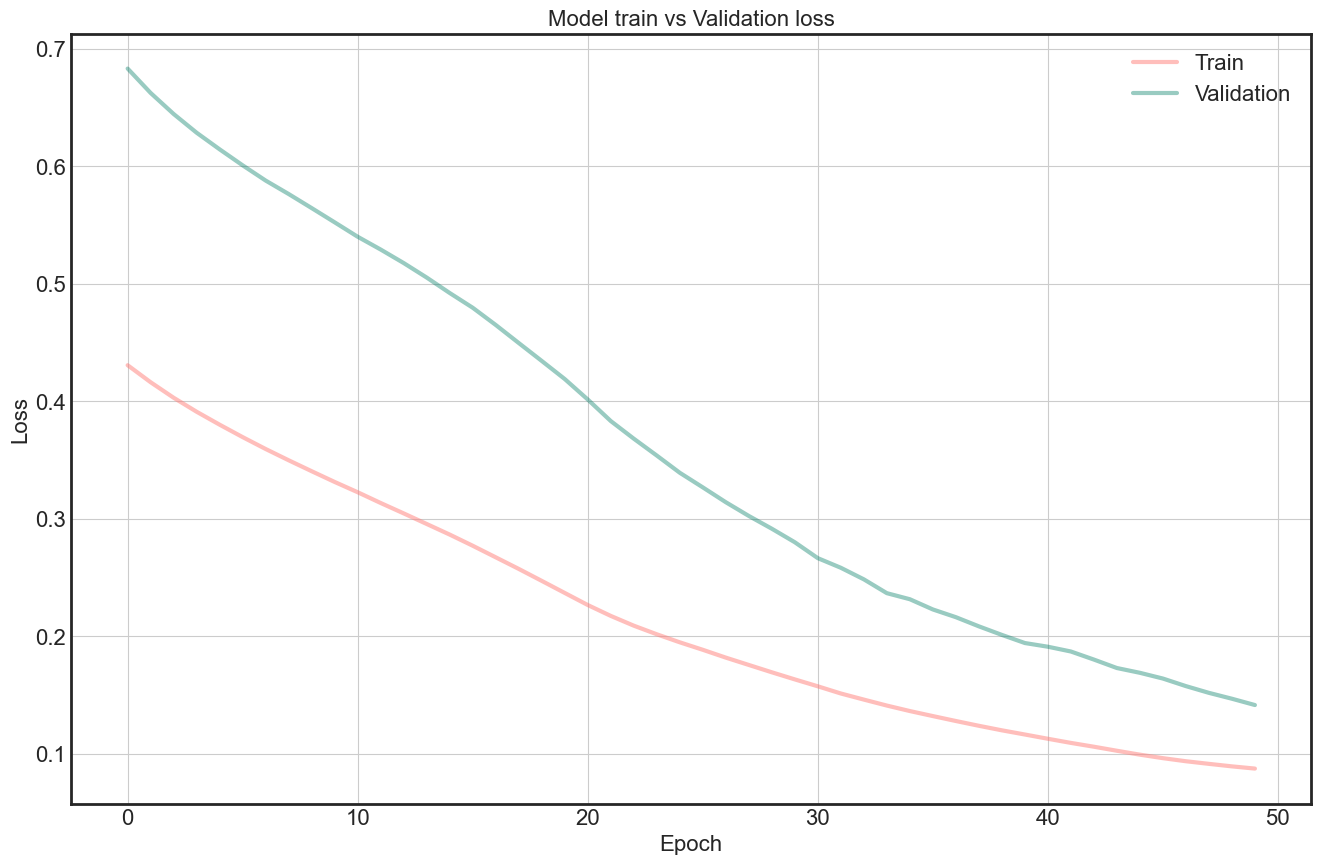

In [13]:
# Plot the loss 
plt.plot(history.history['loss'], color='#FF7E79',linewidth=3, alpha=0.5)
plt.plot(history.history['val_loss'], color='#007D66', linewidth=3, alpha=0.4)
plt.title('Model train vs Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid(True)
plt.show()

In [14]:
print("Training loss:", history.history['loss'][-1])
print("Validation loss:", history.history['val_loss'][-1])

Training loss: 0.0873124897480011
Validation loss: 0.14139214158058167


In [15]:
def plot3clusters(X, title, vtitle, target_names):
    colors = ['#A43F98', '#5358E0', '#DE0202']
    s = 50
    alpha = 0.7
    
    plt.figure(figsize=(9, 7))
    plt.grid(True)
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=alpha, s=s, label=target_name)
   
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title, fontsize=16, fontweight='bold')
    
    plt.text(0.5, -0.1, 'Principal Component 1', ha='center', fontsize=12, fontweight='bold', transform=plt.gca().transAxes)
    plt.text(-0.1, 0.5, 'Principal Component 2', va='center', rotation='vertical', fontsize=12, fontweight='bold', transform=plt.gca().transAxes)
    
    plt.show()

5/5 [==============================] - 0s 4ms/step


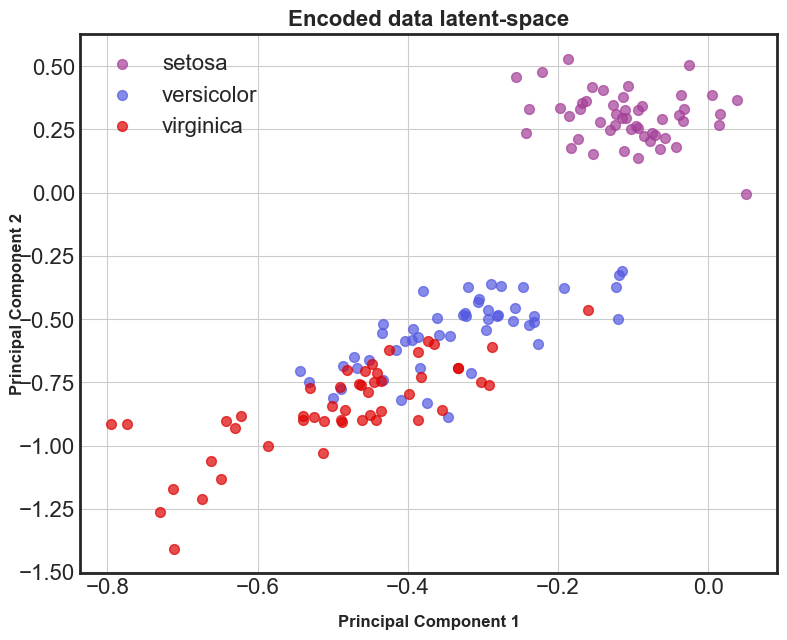

In [16]:
encoder = tf.keras.Model(input_layer, encoding_layer)
encoded_data = encoder.predict(X_scaled)

target_names = iris.target_names

plot3clusters(encoded_data, 'Encoded data latent-space', 'dimension ', target_names);